# PML HW2 Submission Notebook

Name - Atreya Goswami<br/>
Roll No. - 190201<br/>
Date of submission - January 30, 2023<br/>


## Q5 : Gaussian Processes

### Part 2: Visualizing GP Priors and Posteriors for Regression

In [1]:
# Importing required modules

import numpy as np
import matplotlib.pyplot as plt

We define some constants and seeds.

In [2]:
delta = 1e-4                                                            # small positive no. added for matrix invertibility
np.random.seed(42)                                                      # for result reproducibility
l_values = [0.2, 0.5, 1, 2, 10]                                         # possible values that l can take
N = 100                                                                 # size of training data
rho_sq = 1                                                              # given value of hyperparameter of kernel function
sigma_sq = 0.05                                                         # given value of noise variance

Now, let us generate the training data $$\left(\mathbf{X},\mathbf{y}\right) = \left\{x_n,y_n\right\}_{n=1}^N$$ assuming the model $$y_n = \sin(x_n)+\epsilon_n$$ with $\epsilon_n \sim \mathcal{N}(0,\sigma^2)$ where $\sigma^2 = 0.05$. We generate $N = 100$ equally spaced inputs $x_1,x_2,...,x_N$ in the interval $[0,4\pi]$ and their corresponding outputs using the defined model.

In [3]:
X = np.linspace(0,4*np.pi,N).reshape(N,1)                           # generate X = [x_1, x_2, ... , x_N]^T
sin_X = np.sin(X)                                                       # noiseless y = sin(X)
y = np.sin(X)+np.random.normal(loc=0,scale=np.sqrt(sigma_sq),size=(N,1)) # generate outputs y using model

Let us visualize the generated data using a scatter plot.

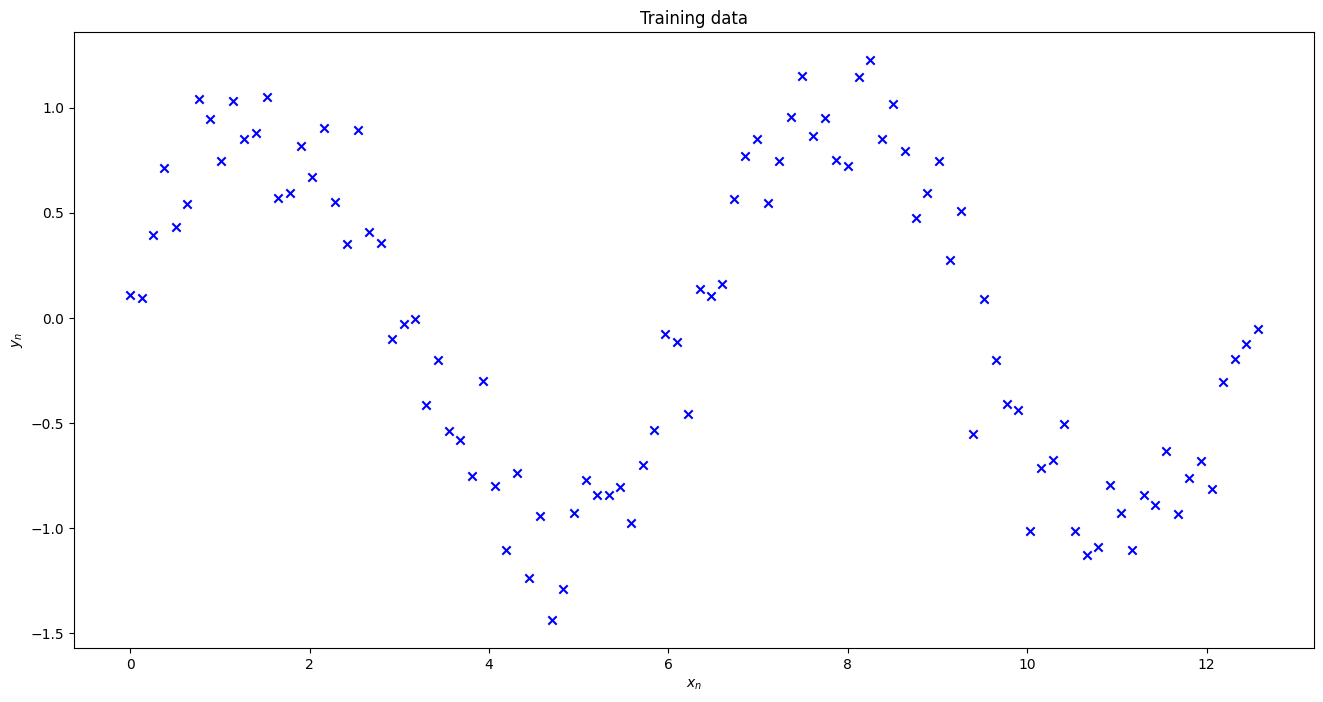

In [4]:
plt.figure(figsize=(16,8))
plt.scatter(X,y,c="Blue",marker="x")
plt.xlabel(r'$x_n$')
plt.ylabel(r'$y_n$')
plt.title('Training data')
plt.show()

Now, let us define the SE kernel function $\kappa(x,x') = \rho^2 \exp\left(-\frac{(x-x')^2}{l^2}\right)$ with $\rho^2 = 1$.

In [5]:
def se_kernel(x,x_,l,rho=1):
    k = rho**2 * np.exp(-((x-x_)**2)/l**2)
    return k

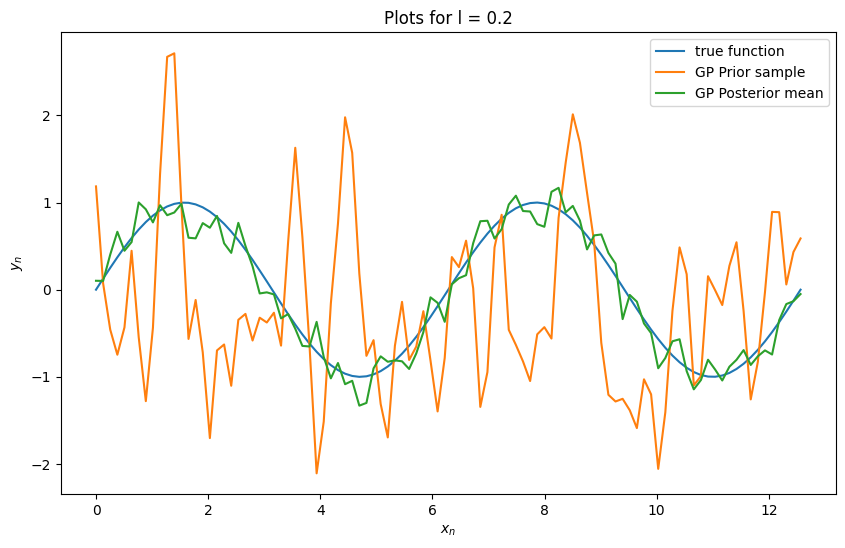

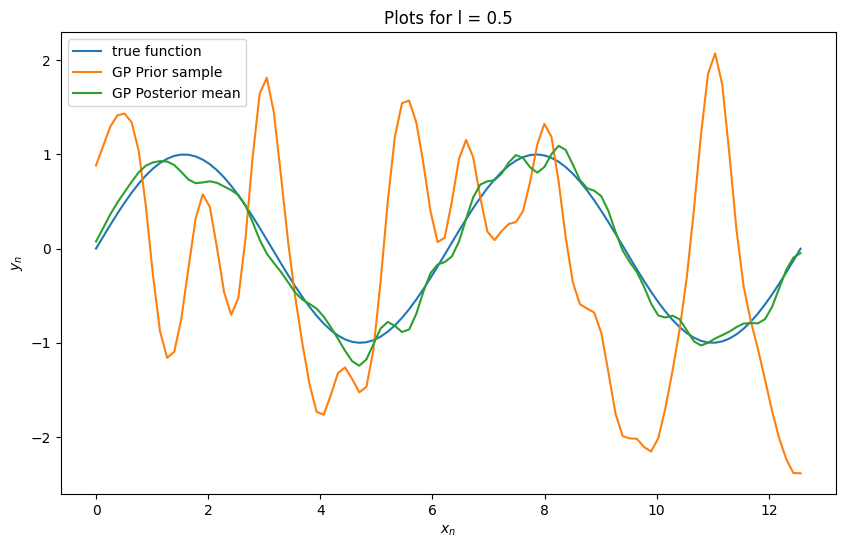

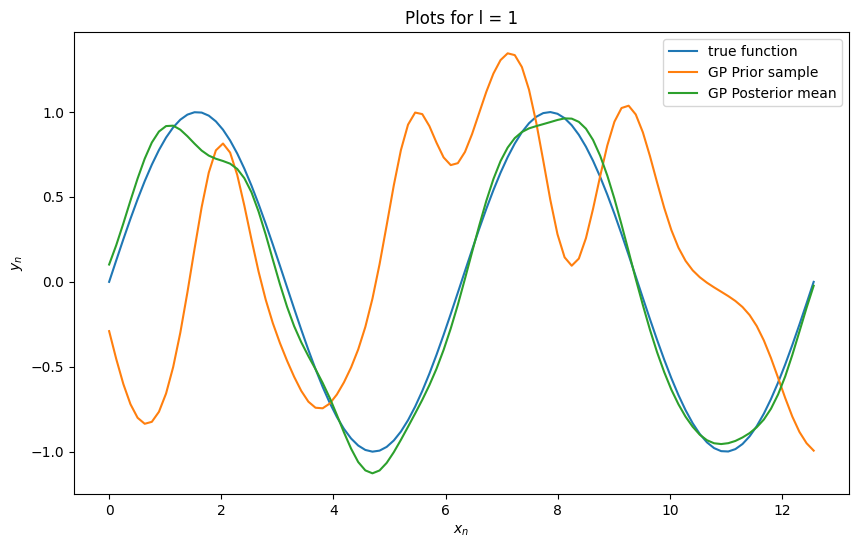

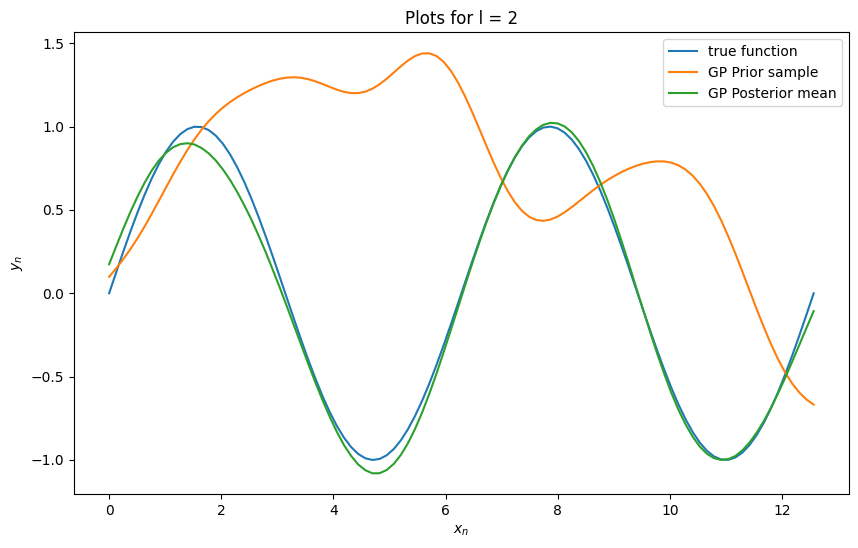

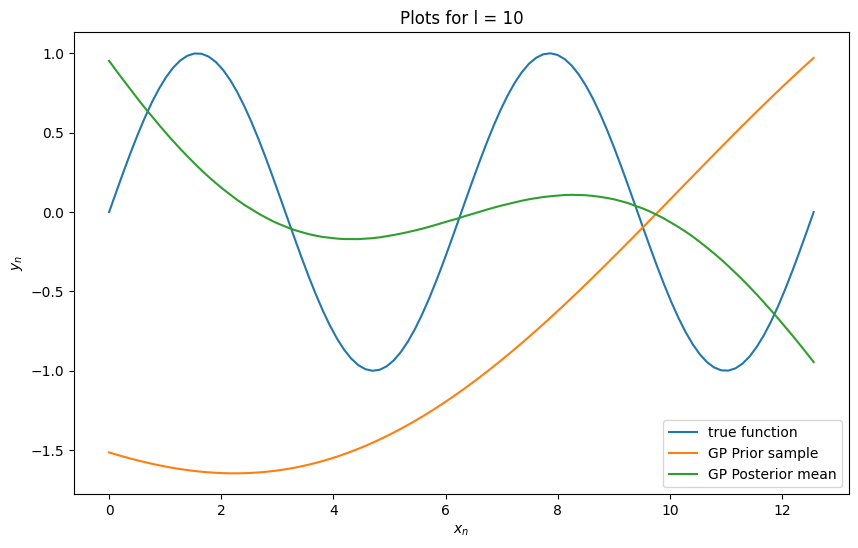

In [6]:
# figure,axis = plt.subplots(5,1,figsize=(14,40))
ctr = 0
RMSE_noisy = np.zeros(len(l_values))
RMSE_true = np.zeros(len(l_values))

for l in l_values:
    # First let us create the kernel matrix K
    K = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            K[i,j] = se_kernel(X[i],X[j],l)

    # Now, we draw a random sample from GP prior N(0,K)
    sample = np.random.multivariate_normal(np.zeros(N),K).reshape(-1,1)

    # Now we calculate the GP posterior covariance and mean using formula derived in 5.1
    gp_posterior_cov = np.linalg.inv(np.linalg.inv(K+delta*np.eye(N))+1/sigma_sq*np.eye(N))
    gp_posterior_mean = 1/sigma_sq*(gp_posterior_cov@y)

    RMSE_noisy[ctr] = np.sqrt(np.square(np.linalg.norm(y-gp_posterior_mean, ord=2))/N)
    RMSE_true[ctr] = np.sqrt(np.square(np.linalg.norm(sin_X-gp_posterior_mean, ord=2))/N)

    # Plot all the curves
    plt.figure(figsize=(10,6))
    # axis[ctr].plot(X,y)
    plt.plot(X,sin_X,label='true function')
    plt.plot(X,sample,label='GP Prior sample')
    plt.plot(X,gp_posterior_mean,label='GP Posterior mean')
    plt.xlabel(r'$x_n$')
    plt.ylabel(r'$y_n$')
    plt.title(f'Plots for l = {l}')
    plt.legend()
    plt.savefig(f'plot_l={l}.png')
    ctr = ctr+1

In [7]:
print(RMSE_noisy)      # RMSE between noisy data points and GP posterior mean

[0.06695279 0.15887949 0.18187092 0.1914172  0.61077893]


In [8]:
print(RMSE_true)       # RMSE between true function and GP posterior mean

[0.16718829 0.10886878 0.08409257 0.06778186 0.57949854]


### Comments on the generated plots

GP Prior sample: The random sample from GP prior doesn't depend on the data, but it depends on the value of $l$. For small value of $l$, the curve has more jitters since the off-diagonal terms in the kernel matrix $K$ increase. It is smooth for larger values of $l$.<br/>


GP posterior mean: For small values of $l$, the posterior mean curve overfits the training data as it tries to model the noise as well. Curve with $l=2$ best fits the true function as shown by the above RMSE calculations. 